In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
dataset=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [73]:
dataset=np.array(dataset)
m,n=dataset.shape
np.random.shuffle(dataset)

devdata=dataset[1:1000].T
ydev=devdata[0]
xdev=devdata[1:n]
xdev=xdev/255

traindata=dataset[1000:m].T
ytrain=traindata[0]
xtrain=traindata[1:n]
xtrain=xtrain/255

In [74]:
xtrain[:,1].shape

(784,)

In [75]:
def params():
    w1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    w2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5

    return w1,b1,w2,b2

In [76]:
def ReLU(Z):
    return np.maximum(0,Z)

In [77]:
def softmax(z):
    a=np.exp(z) / sum(np.exp(z))
    return a

In [78]:
def onehot(y):
    onehoty=np.zeros((y.size, y.max()+1))
    onehoty[np.arange(y.size), y]=1
    onehoty=onehoty.T
    return onehoty 

In [79]:
def forwardprop(w1,b1,w2,b2,x):
    z1=w1.dot(x)+b1
    a1=ReLU(z1)
    
    z2=w2.dot(z1)+b2
    a2=softmax(z2)
    return z1,a1,z2,a2

In [80]:
def derivReLU(z):
    return z>0

In [81]:
def backprop(z1,a1,z2,a2,w2,x,y):
    m=y.size
    onehoty=onehot(y)
    dz2=a2-onehoty
    dw2=1/m*dz2.dot(a1.T)
    db2=1/m*np.sum(dz2)
    dz1=w2.T.dot(dz2)* derivReLU(z1)
    dw1=1/m*dz1.dot(x.T)
    db1=1/m*np.sum(dz1)
    return dw1,db1,dw2,db2

def update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha):
    w1=w1-alpha*dw1
    b1=b1-alpha*db1
    w2=w2-alpha*dw2
    b2=b2-alpha*db2
    return w1,b1,w2,b2
    

In [82]:
def getpred(a2):
    return np.argmax(a2,0)

def getaccu(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size
    

In [83]:
def gradientdescent(x,y,iterations,alpha):
    w1,b1,w2,b2=params()
    for i in range(iterations):
        z1,a1,z2,a2 = forwardprop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2=backprop(z1,a1,z2,a2,w2,x,y)
        w1,b1,w2,b2=update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 10 == 0:
            print("Iteration: ",i)
            prediction=getpred(a2)
            print("Accuracy: ",getaccu(getpred(a2),y))
    return w1,b1,w2,b2

In [84]:
w1,b1,w2,b2=gradientdescent(xtrain,ytrain,500,0.1)

Iteration:  0
[8 8 8 ... 8 5 8] [7 7 0 ... 0 9 0]
Accuracy:  0.08202439024390244
Iteration:  10
[0 0 6 ... 8 9 8] [7 7 0 ... 0 9 0]
Accuracy:  0.16553658536585367
Iteration:  20
[0 0 0 ... 8 9 2] [7 7 0 ... 0 9 0]
Accuracy:  0.26482926829268294
Iteration:  30
[0 7 0 ... 0 9 0] [7 7 0 ... 0 9 0]
Accuracy:  0.3453414634146341
Iteration:  40
[0 7 0 ... 0 9 0] [7 7 0 ... 0 9 0]
Accuracy:  0.40673170731707314
Iteration:  50
[4 7 0 ... 0 9 0] [7 7 0 ... 0 9 0]
Accuracy:  0.4553658536585366
Iteration:  60
[4 7 0 ... 0 9 0] [7 7 0 ... 0 9 0]
Accuracy:  0.48929268292682926
Iteration:  70
[4 7 0 ... 0 7 0] [7 7 0 ... 0 9 0]
Accuracy:  0.5181707317073171
Iteration:  80
[4 7 0 ... 0 7 0] [7 7 0 ... 0 9 0]
Accuracy:  0.540829268292683
Iteration:  90
[7 7 0 ... 0 7 0] [7 7 0 ... 0 9 0]
Accuracy:  0.5604146341463415
Iteration:  100
[7 7 0 ... 0 7 0] [7 7 0 ... 0 9 0]
Accuracy:  0.5745365853658536
Iteration:  110
[7 7 0 ... 0 7 0] [7 7 0 ... 0 9 0]
Accuracy:  0.5872195121951219
Iteration:  120
[7 7 0 

In [92]:
def makepred(x,w1,b1,w2,b2):
    _,_,_,a2=forwardprop(w1,b1,w2,b2,x)
    pred=getpred(a2)
    return pred


def testpred(index,w1,b1,w2,b2):
    currimg=xtrain[:,index,None]
    pred=makepred(xtrain[:,index,None],w1,b1,w2,b2)
    label=ytrain[index]
    print("Prediction: ", pred)
    print("Label: ", label)

    currimg=currimg.reshape((28,28))*255
    plt.gray()
    plt.imshow(currimg,interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


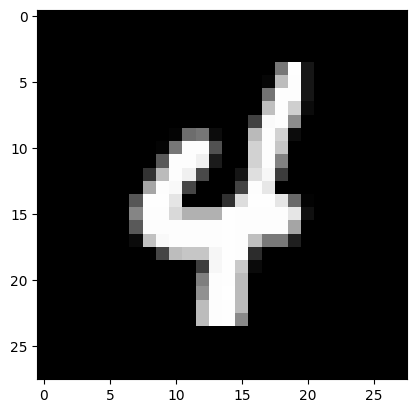

In [94]:
testpred(5,w1,b1,w2,b2)

Prediction:  [3]
Label:  3


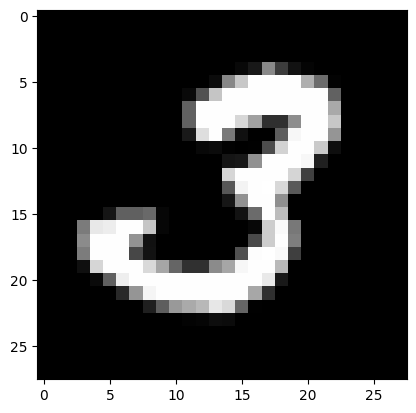

In [95]:
testpred(53,w1,b1,w2,b2)